In [429]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Introduction

The data can be found under the following link: https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices

The goal of the project is price prediction based on the input features

In [430]:
df = pd.read_csv('./data/Australian Vehicle Prices.csv')

In [431]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

# Data understanding

One of the biggest challange will be, that most of the feature vectors contains string values

In [433]:
print(f"Shape: {df.shape}\n\nColumns: {list(df.columns)}")

Shape: (16734, 19)

Columns: ['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine', 'BodyType', 'Doors', 'Seats', 'Price']


In [434]:
# checking the number of unique values in each column
df[df.columns].nunique()

Brand                   76
Year                    45
Model                  781
Car/Suv                618
Title                 8804
UsedOrNew                3
Transmission             3
Engine                 106
DriveType                5
FuelType                 9
FuelConsumption        157
Kilometres           14262
ColourExtInt           834
Location               618
CylindersinEngine       11
BodyType                10
Doors                   13
Seats                   13
Price                 3794
dtype: int64

In [435]:
df.BodyType.value_counts()

SUV             6907
Hatchback       2697
Ute / Tray      2512
Sedan           1983
Wagon           1232
Commercial       610
Coupe            336
Convertible      131
Other             23
People Mover      21
Name: BodyType, dtype: int64

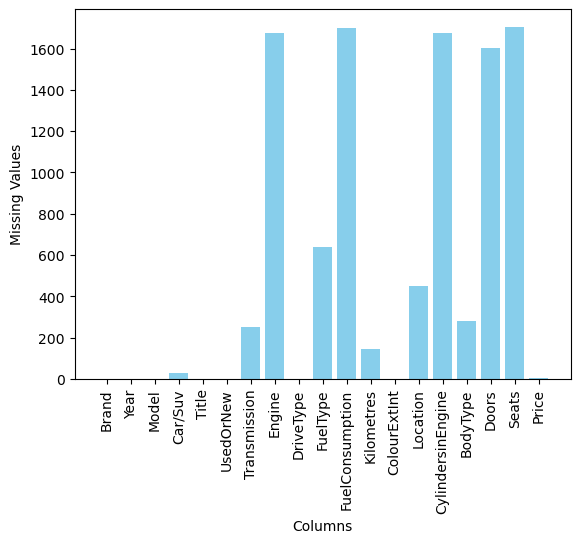

In [436]:
# Check the missing values
missing_df = (df.isnull().sum() + df.apply(lambda col: col[col == '-'].count()))
plt.bar(missing_df.index, missing_df.values, color = "skyblue")
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.show()

The data shows that in 450 cases out of 16734 the location is not given. This might be just due to poor data maintanance, however it should be considered, that for some cases it was a sensitive information and was not published intentionally.

In the second step, the target column, the price column was examined and the 3 rows without price values were eliminated from the dataset. One of those rows seemed to have just NaN values.

In [437]:
df[df.Price.isnull()]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10156,Isuzu,2016.0,D-MAX,Ute / Tray,2016 Isuzu D-MAX LS-U HI-Ride (4X4),USED,Automatic,"4 cyl, 3 L",4WD,Diesel,8.1 L / 100 km,147648,Silver / Black,"Hoppers Crossing, VIC",4 cyl,Ute / Tray,2 Doors,4 Seats,NaN
11039,Nissan,2018.0,Pathfinder,City Jeep - Pre Owned,2018 Nissan Pathfinder Ti X-tronic 2WD,USED,Automatic,-,Front,Unleaded,-,52414,White / Black,"Southbank, VIC",-,Wagon,NaN,NaN,NaN


In [438]:
# as the goal of the analysis is to predict the price of the car, we can drop the rows with missing values in the price column
df = df.dropna(subset=['Price'], axis=0)
# adding the missing values in the Location column with the string 'Unknown'
df['Location'].fillna(value='Unknown', inplace=True)

An additional preparation step is to extract the numeric informations from the string columns

In [439]:
df['Engine'].unique()

array(['4 cyl, 2.2 L', '4 cyl, 1.5 L', '4 cyl, 2 L', '8 cyl, 5.5 L',
       '4 cyl, 1.3 L', '-', '4 cyl, 1.6 L', '4 cyl, 2.7 L', '4 cyl, 3 L',
       '4 cyl, 1.4 L', '3 cyl, 1 L', '4 cyl, 2.4 L', '6 cyl, 3 L',
       '4 cyl, 2.5 L', '3 cyl, 1.2 L', '6 cyl, 2.7 L', '4 cyl, 1.8 L',
       '6 cyl, 4 L', '6 cyl, 3.5 L', '6 cyl, 3.2 L', '8 cyl, 6 L',
       '5 cyl, 3.2 L', '4 cyl, 2.3 L', '8 cyl, 4.1 L', '6 cyl, 3.6 L',
       '4 cyl, 1.2 L', '8 cyl, 4.8 L', '6 cyl, 3.8 L', '5 cyl, 2.5 L',
       '6 cyl, 3.3 L', '6 cyl, 4.2 L', '3 cyl, 1.5 L', '4 cyl, 2.8 L',
       '8 cyl, 4.5 L', '12 cyl, 6.6 L', '6 cyl, 3.7 L', '4 cyl, 2.1 L',
       '3 cyl, 1.3 L', '8 cyl, 4.4 L', '6 cyl, 2.5 L', '8 cyl, 5 L',
       '8 cyl, 4.2 L', '3 cyl, 1.6 L', '4 cyl, 1.9 L', '0 L',
       '8 cyl, 4 L', '8 cyl, 5.7 L', '4 cyl, 3.2 L', '2 cyl, 0.9 L',
       '8 cyl, 6.2 L', '8 cyl, 4.7 L', '6 cyl, 2.4 L', '4 cyl, 1.7 L',
       '5 cyl, 2.4 L', '8 cyl, 4.6 L', '8 cyl, 6.4 L', '6 cyl, 2.8 L',
       '6 cyl, 2.9 L', '8

In [440]:
df['Doors'].unique()

array([' 4 Doors', ' 5 Doors', ' 2 Doors', nan, ' 3 Doors', ' 7 Seats',
       ' 5 Seats', ' 4 Seats', ' 8 Seats', ' 2 Seats', ' 9 Seats',
       ' 6 Seats', ' 3 Seats', ' 12 Seats'], dtype=object)

In [441]:
df['Seats'].unique()

array([' 7 Seats', ' 5 Seats', ' 4 Seats', nan, ' 2 Seats', ' 3 Seats',
       ' 14 Seats', ' 8 Seats', ' 6 Seats', ' 9 Seats', ' 11 Seats',
       ' 12 Seats', ' 22 Seats', ' 15 Seats'], dtype=object)

In [442]:
df["ColourExtInt"].unique()

array(['White / Black', 'Black / Black', 'Grey / White', 'White / Brown',
       'Grey / Black', 'Grey / -', 'Red / Grey', 'Black / -', 'Blue / -',
       'White / -', 'White / Grey', 'Silver / Grey', 'Blue / Grey',
       'Silver / -', 'Blue / Black', 'Silver / Black', 'Red / -',
       'Black / Tobacco', 'White / Black Cloth', 'Black / Black Cloth',
       'Silver / Black Leather', 'Red / Black', 'Red / Black Cloth',
       'Grey / Grey', 'Black / Storm Grey', 'White / Grey  Cloth',
       'Green / Black', 'Yellow / -', 'Black / Leather',
       'Red / Black  Cloth', 'Black / Grey/Black', 'Orange / Grey',
       'Gold / Black', 'Silver / Cloth', 'Grey / Black Leather',
       'Silver / Beige', 'Black / Grey', 'Yellow / Black', 'Blue / Beige',
       'Green / Grey', 'Brown / Black', 'Black / Beige', '- / -',
       'White / Black Leather', 'Grey / Red', 'Green / -', 'Grey / Beige',
       'Brown / Grey', 'Gold / -',
       'Blue / Knight Black Synthetic Leather', 'Black / Black Leathe

In [443]:
df["Location"].unique()

array(['Caringbah, NSW', 'Brookvale, NSW', 'Sylvania, NSW',
       'Mount Druitt, NSW', 'Castle Hill, NSW', 'Saint Marys, NSW',
       'Blacktown, NSW', 'Wentworthville, NSW', 'Mcgraths Hill, NSW',
       'Lidcombe, NSW', 'Rouse Hill, NSW', 'Five Dock, NSW',
       'Haberfield, NSW', 'Cabramatta, NSW', 'Glebe, NSW', 'Camden, NSW',
       'Lansvale, NSW', 'Croydon, NSW', 'Pendle Hill, NSW',
       'Smithfield, NSW', 'Ingleburn, NSW', 'Seven Hills, NSW',
       'Granville, NSW', 'Minchinbury, NSW', 'Ryde, NSW', 'Homebush, NSW',
       'Elderslie, NSW', 'Campbelltown, NSW', 'Bankstown, NSW',
       'North Narrabeen, NSW', 'Chester Hill, NSW', 'Liverpool, NSW',
       'West Ryde, NSW', 'Kirrawee, NSW', 'Smeaton Grange, NSW',
       'Minto, NSW', 'Windsor, NSW', 'Penrith, NSW', 'Kogarah, NSW',
       'South Windsor, NSW', 'Artarmon, NSW', 'Arncliffe, NSW',
       'Darlinghurst, NSW', 'Eastern Creek, NSW', 'Rydalmere, NSW',
       'Carlton, NSW', 'Leichhardt, NSW', 'Punchbowl, NSW',
       '

In most of the cases the Engine column contains the following string structure 'X cyl, Y L', thus it can be split into two numeric columns. 

In [444]:
df['Doors'] = df['Doors'].str.extract('(\d+)').astype(float)
df['Seats'] = df['Seats'].str.extract('(\d+)').astype(float)
df['FuelConsumption'] = df['FuelConsumption'].str.extract('([\d.]+) L / 100 km').astype(float)
df['CylindersinEngine'] = df['CylindersinEngine'].str.extract('(\d+)').astype(float)
df['EngineCyl'] = df['Engine'].str.extract('([\d.]+)').astype(float)
df['EngineVolume'] = df['Engine'].str.extract(', (.*?)(?= L)').astype(float)
df['Transmission'] = df['Transmission'].replace('-', np.nan)
df['FuelType'] = df['FuelType'].replace('-', np.nan)
df['FuelType'] = df['FuelType'].replace('Other', np.nan)
df['BodyType'] = df['BodyType'].replace('Other', np.nan)
df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce')
df["Price"] = pd.to_numeric(df['Price'], errors='coerce').astype(float)
df['Year'] = df['Year'].astype(float)
df["ExtCol"] = df["ColourExtInt"].str.extract('^([^\/]+)')
df["State"] = df["Location"].str.extract('[^,]+\s*,\s*([^,]+)')

In [445]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,...,Location,CylindersinEngine,BodyType,Doors,Seats,Price,EngineCyl,EngineVolume,ExtCol,State
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,...,"Caringbah, NSW",4.0,SUV,4.0,7.0,51990.0,4.0,2.2,White,NSW
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,...,"Brookvale, NSW",4.0,Hatchback,5.0,5.0,19990.0,4.0,1.5,Black,NSW
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,...,"Sylvania, NSW",4.0,Coupe,2.0,4.0,108988.0,4.0,2.0,Grey,NSW
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,...,"Mount Druitt, NSW",8.0,Coupe,2.0,4.0,32990.0,8.0,5.5,White,NSW
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,...,"Castle Hill, NSW",4.0,SUV,4.0,5.0,34990.0,4.0,1.3,Grey,NSW


In [446]:
df[df.EngineCyl != df.CylindersinEngine].shape

(1673, 23)

In [447]:
df[df.EngineCyl != df.CylindersinEngine]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,...,Location,CylindersinEngine,BodyType,Doors,Seats,Price,EngineCyl,EngineVolume,ExtCol,State
5,Toyota,2004.0,Estima,ON FOUR WHEELS,2004 Toyota Estima T EDITION,USED,Automatic,-,Other,Unleaded,...,"Saint Marys, NSW",NaN,Commercial,NaN,NaN,9990.0,NaN,NaN,Grey,NSW
10,Toyota,2009.0,HiAce,Carbarn,2009 Toyota HiAce (No Badge),USED,Automatic,-,Other,Unleaded,...,"Lidcombe, NSW",NaN,Commercial,NaN,NaN,42500.0,NaN,NaN,White,NSW
12,Honda,2015.0,City,USED Dealer ad,2015 Honda City GM VTi-L Sedan 4dr CVT 7sp 1.5...,USED,Automatic,-,Other,Unleaded,...,"Rouse Hill, NSW",NaN,NaN,NaN,NaN,11999.0,NaN,NaN,Black,NSW
13,Toyota,2017.0,HiAce,USED Dealer ad,2017 Toyota HiAce,USED,Automatic,-,Other,NaN,...,"Lidcombe, NSW",NaN,NaN,NaN,NaN,38999.0,NaN,NaN,Silver,NSW
17,Mitsubishi,2013.0,Outlander,Exclusive Autohaus,2013 Mitsubishi Outlander ES,USED,Manual,-,Other,NaN,...,"Blacktown, NSW",NaN,Wagon,NaN,NaN,13999.0,NaN,NaN,Blue,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,Nissan,2010.0,Elgrand,USED Dealer ad,2010 Nissan Elgrand,USED,Automatic,-,Other,NaN,...,"Slacks Creek, QLD",NaN,NaN,NaN,NaN,19000.0,NaN,NaN,White,QLD
16723,Suzuki,2022.0,Swift,NEW In stock,2022 Suzuki Swift GL Plus,NEW,Automatic,-,Front,Unleaded,...,"Indooroopilly, QLD",NaN,Hatchback,NaN,NaN,28590.0,NaN,NaN,Silver,QLD
16726,Toyota,2011.0,Estima,Topcar Rez,2011 Toyota Estima,USED,Automatic,-,Front,Unleaded,...,"Holland Park West, QLD",NaN,Wagon,7.0,NaN,21989.0,NaN,NaN,Silver,QLD
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,...,"Rocklea, QLD",NaN,Commercial,7.0,NaN,29500.0,NaN,NaN,Grey,QLD


In [448]:
df.isnull().sum() + df.apply(lambda col: col[col == '-'].count())

Brand                   0
Year                    0
Model                   0
Car/Suv                27
Title                   0
UsedOrNew               0
Transmission          251
Engine               1673
DriveType               0
FuelType              679
FuelConsumption      1696
Kilometres            591
ColourExtInt            0
Location                0
CylindersinEngine    1673
BodyType              304
Doors                1602
Seats                1703
Price                  50
EngineCyl            1673
EngineVolume         1781
ExtCol                  0
State                 449
dtype: int64

The EngineCyl and the CylindersinEngine columns are after the transformation identical and both have the NaN values for the same entities. Therefore one could drop one of these columns. The more interesting information extraction is to extract the volume parameters from the Engine column, that is stored in column EngineVolume.

In [449]:
print(f"Unique values in the Engine column in case the EngineVolumne value is missing but the EngineVolume is give: {df[df['EngineVolume'].isnull() & df['EngineCyl'].notnull()].loc[:,['Engine', 'EngineCyl', 'EngineVolume']].Engine.unique()}")
df[df['EngineVolume'].isnull() & df['EngineCyl'].notnull()].loc[:,["Engine", "EngineCyl", "EngineVolume"]].query('Engine != "0 L"')

Unique values in the Engine column in case the EngineVolumne value is missing but the EngineVolume is give: ['0 L' '4 cyl' '2 L']


,Engine,EngineCyl,EngineVolume
8756,4 cyl,4.0,NaN
15035,2 L,2.0,NaN


In [450]:
# clean the table
df = df.drop(['Engine', 'Title', 'EngineCyl', "ColourExtInt", "Model", "Car/Suv", "Location"], axis=1)
df.head()

,Brand,Year,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,EngineVolume,ExtCol,State
0,Ssangyong,2022.0,DEMO,Automatic,AWD,Diesel,8.7,5595.0,4.0,SUV,4.0,7.0,51990.0,2.2,White,NSW
1,MG,2022.0,USED,Automatic,Front,Premium,6.7,16.0,4.0,Hatchback,5.0,5.0,19990.0,1.5,Black,NSW
2,BMW,2022.0,USED,Automatic,Rear,Premium,6.6,8472.0,4.0,Coupe,2.0,4.0,108988.0,2.0,Grey,NSW
3,Mercedes-Benz,2011.0,USED,Automatic,Rear,Premium,11.0,136517.0,8.0,Coupe,2.0,4.0,32990.0,5.5,White,NSW
4,Renault,2022.0,USED,Automatic,Front,Unleaded,6.0,1035.0,4.0,SUV,4.0,5.0,34990.0,1.3,Grey,NSW


In [451]:
print(f"The types of fuel used in the cars: {df.FuelType.unique()}")
df[df["FuelConsumption"].isnull()]

The types of fuel used in the cars: ['Diesel' 'Premium' 'Unleaded' 'Hybrid' nan 'Electric' 'LPG' 'Leaded']


,Brand,Year,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,EngineVolume,ExtCol,State
5,Toyota,2004.0,USED,Automatic,Other,Unleaded,NaN,160230.0,NaN,Commercial,NaN,NaN,9990.0,NaN,Grey,NSW
10,Toyota,2009.0,USED,Automatic,Other,Unleaded,NaN,148190.0,NaN,Commercial,NaN,NaN,42500.0,NaN,White,NSW
12,Honda,2015.0,USED,Automatic,Other,Unleaded,NaN,181745.0,NaN,NaN,NaN,NaN,11999.0,NaN,Black,NSW
13,Toyota,2017.0,USED,Automatic,Other,NaN,NaN,136296.0,NaN,NaN,NaN,NaN,38999.0,NaN,Silver,NSW
17,Mitsubishi,2013.0,USED,Manual,Other,NaN,NaN,120020.0,NaN,Wagon,NaN,NaN,13999.0,NaN,Blue,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,Nissan,2010.0,USED,Automatic,Other,NaN,NaN,132000.0,NaN,NaN,NaN,NaN,19000.0,NaN,White,QLD
16723,Suzuki,2022.0,NEW,Automatic,Front,Unleaded,NaN,20.0,NaN,Hatchback,NaN,NaN,28590.0,NaN,Silver,QLD
16726,Toyota,2011.0,USED,Automatic,Front,Unleaded,NaN,97000.0,NaN,Wagon,7.0,NaN,21989.0,NaN,Silver,QLD
16729,Toyota,2014.0,USED,Automatic,Front,Unleaded,NaN,66000.0,NaN,Commercial,7.0,NaN,29500.0,NaN,Grey,QLD


The drive type can easily be split into more numerical terms by 2 columns indicating front & rear wheel drive

In [452]:
# 1st determine unique values
df['DriveType'].unique()

array(['AWD', 'Front', 'Rear', 'Other', '4WD'], dtype=object)

In [453]:
def label_front(row):
	match row['DriveType']:
		case 'AWD':
			return True
		case 'Front':
			return True
		case 'Rear':
			return False
		case 'Other':
			return None
		case '4WD':
			return True

def label_rear(row):
	match row['DriveType']:
		case 'AWD':
			return True
		case 'Front':
			return False
		case 'Rear':
			return True
		case 'Other':
			return None
		case '4WD':
			return True

df['DriveFront'] = df.apply(label_front, axis=1)
df['DriveRear'] = df.apply(label_rear, axis=1)
del df['DriveType']
df.head()

,Brand,Year,UsedOrNew,Transmission,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,EngineVolume,ExtCol,State,DriveFront,DriveRear
0,Ssangyong,2022.0,DEMO,Automatic,Diesel,8.7,5595.0,4.0,SUV,4.0,7.0,51990.0,2.2,White,NSW,True,True
1,MG,2022.0,USED,Automatic,Premium,6.7,16.0,4.0,Hatchback,5.0,5.0,19990.0,1.5,Black,NSW,True,False
2,BMW,2022.0,USED,Automatic,Premium,6.6,8472.0,4.0,Coupe,2.0,4.0,108988.0,2.0,Grey,NSW,False,True
3,Mercedes-Benz,2011.0,USED,Automatic,Premium,11.0,136517.0,8.0,Coupe,2.0,4.0,32990.0,5.5,White,NSW,False,True
4,Renault,2022.0,USED,Automatic,Unleaded,6.0,1035.0,4.0,SUV,4.0,5.0,34990.0,1.3,Grey,NSW,True,False


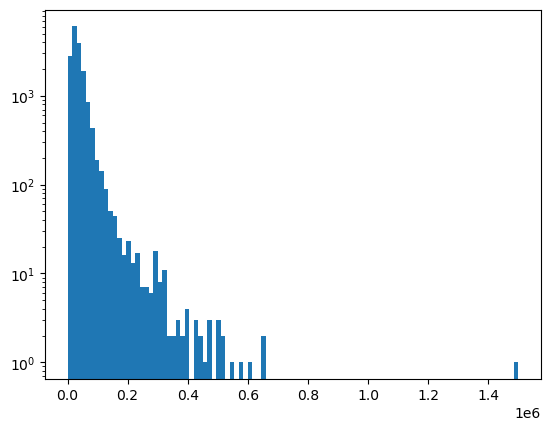

In [454]:
plt.hist(df.Price, bins=100)
plt.yscale("log")

# Visual analysis

In [455]:
df.describe()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price,EngineVolume
count,16731.000000,15035.000000,16140.000000,15058.000000,15129.000000,15028.000000,1.668100e+04,14950.000000
mean,2016.229155,7.663632,100096.117782,4.423629,4.011633,5.101477,3.730333e+04,2.420334
std,5.248000,2.324684,78216.164490,1.120687,0.713248,1.119179,3.717787e+04,0.903867
min,1940.000000,0.000000,1.000000,0.000000,2.000000,2.000000,8.800000e+01,0.000000
25%,2013.000000,6.500000,40751.500000,4.000000,4.000000,5.000000,1.899900e+04,2.000000
50%,2017.000000,7.600000,85951.500000,4.000000,4.000000,5.000000,2.950000e+04,2.200000
75%,2020.000000,8.800000,146523.500000,4.000000,4.000000,5.000000,4.399000e+04,2.800000
max,2023.000000,27.000000,533849.000000,12.000000,12.000000,22.000000,1.500000e+06,9.800000


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'FuelConsumption'}>,
        <Axes: title={'center': 'Kilometres'}>],
       [<Axes: title={'center': 'CylindersinEngine'}>,
        <Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Seats'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'EngineVolume'}>, <Axes: >]], dtype=object)

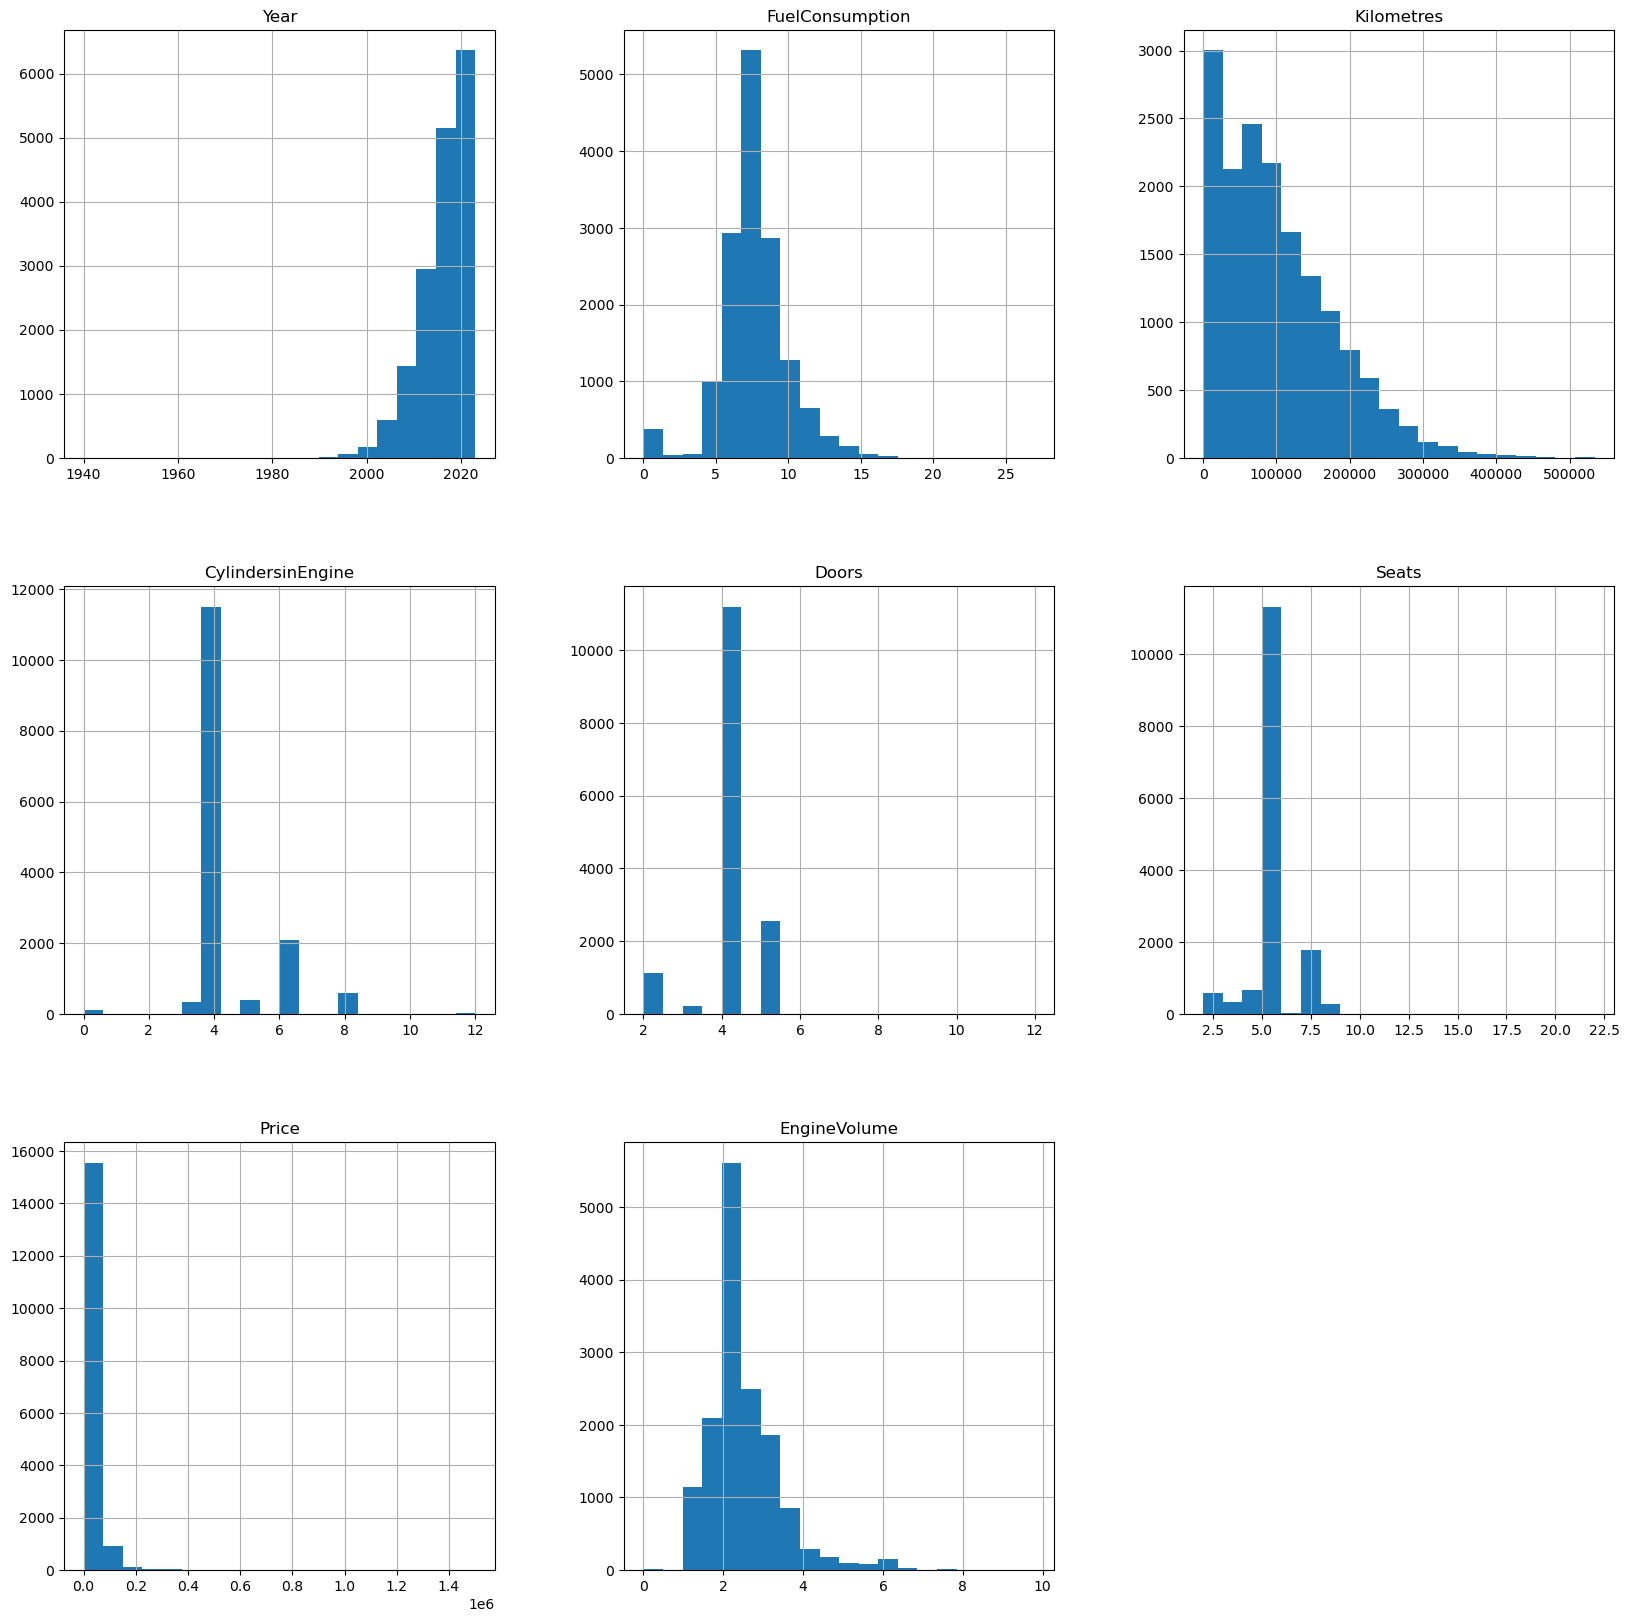

In [456]:
df.hist(bins=20, figsize=(20,20))

Text(0.5, 0, 'Price')

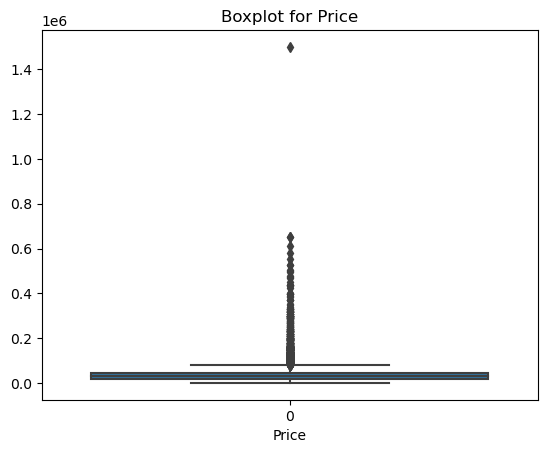

In [457]:
sns.boxplot(df["Price"])
plt.title('Boxplot for Price')
plt.xlabel('Price')

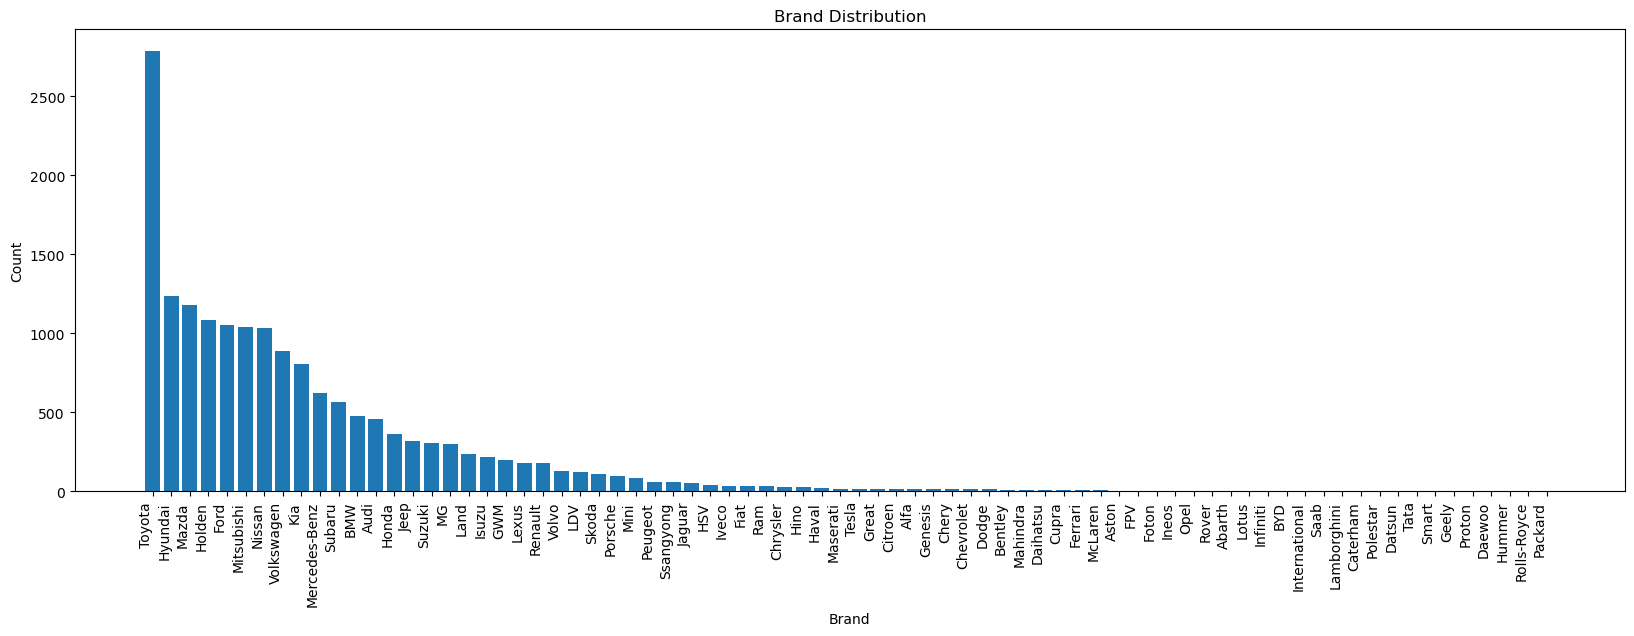

In [458]:
plt.figure(figsize=(20, 6))
brand_counts = df['Brand'].value_counts()
plt.bar(brand_counts.index, brand_counts)
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

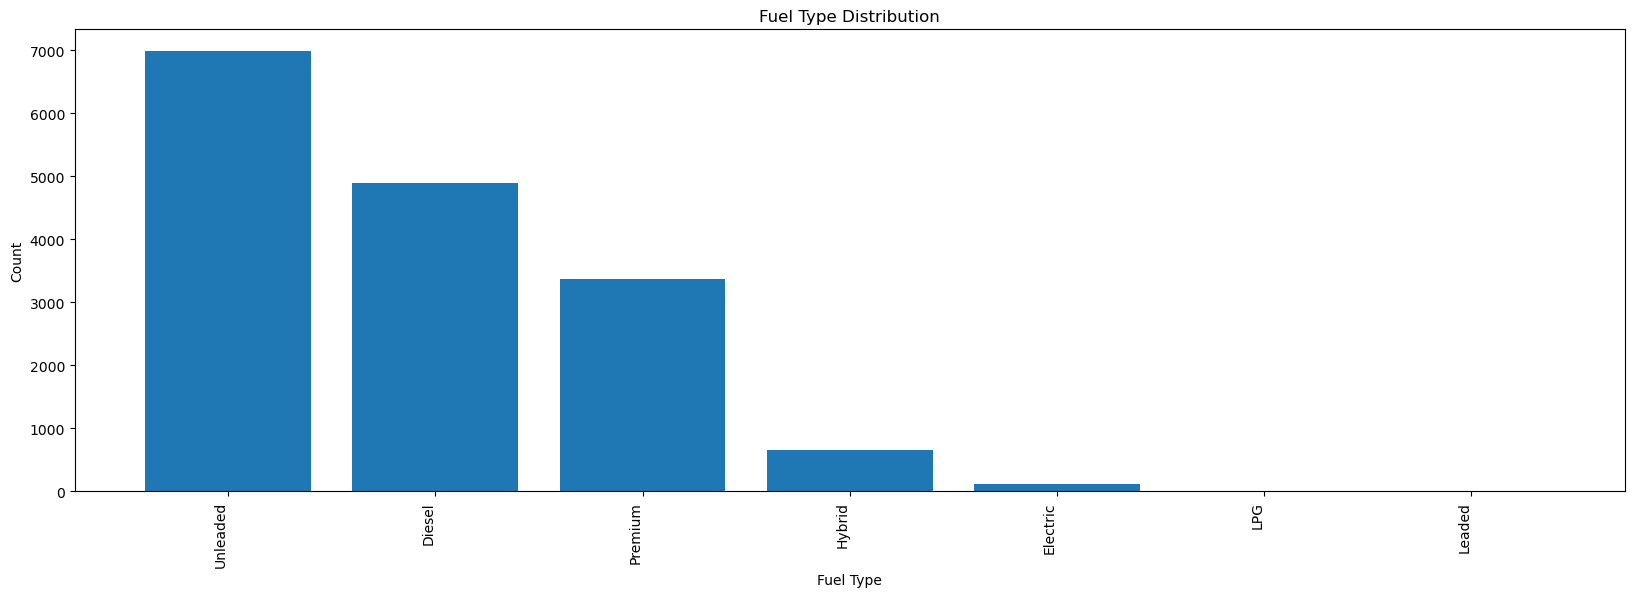

In [459]:
plt.figure(figsize=(20, 6))
brand_counts = df['FuelType'].value_counts()
plt.bar(brand_counts.index, brand_counts)
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

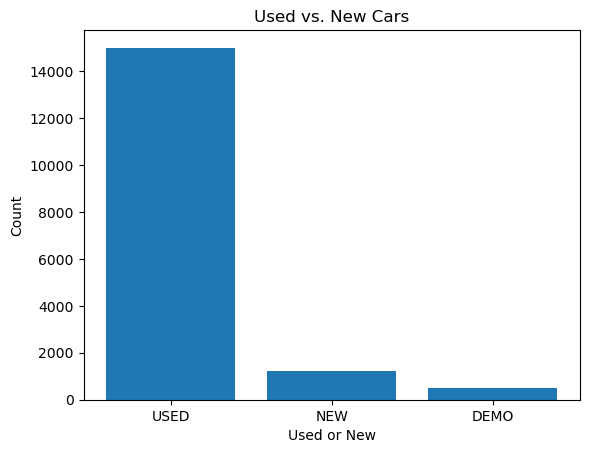

In [460]:
used_vs_new_counts = df['UsedOrNew'].value_counts()
plt.bar(used_vs_new_counts.index, used_vs_new_counts)
plt.title('Used vs. New Cars')
plt.xlabel('Used or New')
plt.ylabel('Count')
plt.show()

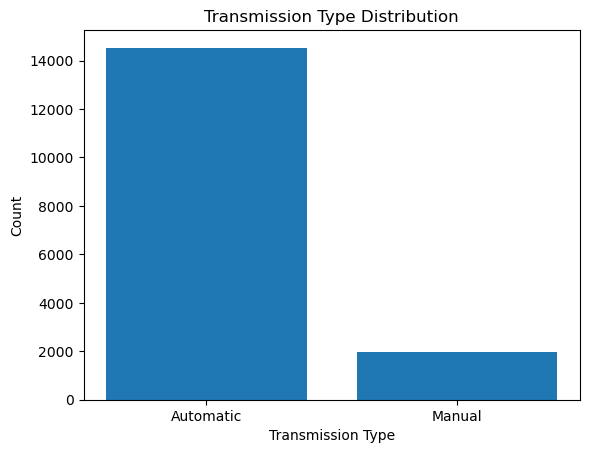

In [461]:
transmission_counts = df['Transmission'].value_counts()
plt.bar(transmission_counts.index, transmission_counts)
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

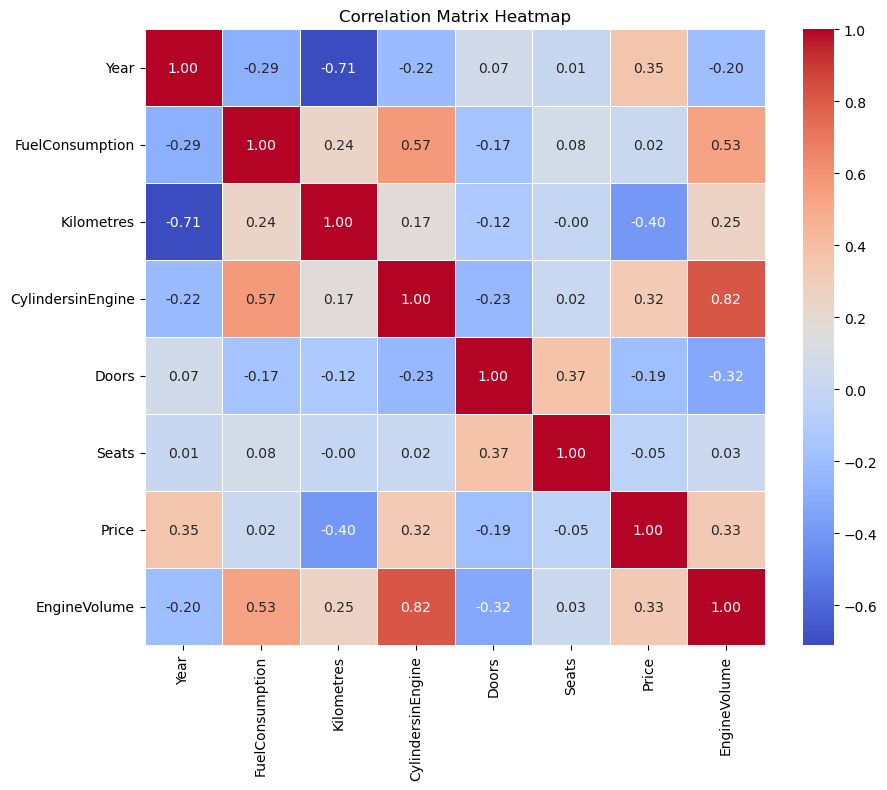

In [462]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [463]:
df.head()

,Brand,Year,UsedOrNew,Transmission,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,EngineVolume,ExtCol,State,DriveFront,DriveRear
0,Ssangyong,2022.0,DEMO,Automatic,Diesel,8.7,5595.0,4.0,SUV,4.0,7.0,51990.0,2.2,White,NSW,True,True
1,MG,2022.0,USED,Automatic,Premium,6.7,16.0,4.0,Hatchback,5.0,5.0,19990.0,1.5,Black,NSW,True,False
2,BMW,2022.0,USED,Automatic,Premium,6.6,8472.0,4.0,Coupe,2.0,4.0,108988.0,2.0,Grey,NSW,False,True
3,Mercedes-Benz,2011.0,USED,Automatic,Premium,11.0,136517.0,8.0,Coupe,2.0,4.0,32990.0,5.5,White,NSW,False,True
4,Renault,2022.0,USED,Automatic,Unleaded,6.0,1035.0,4.0,SUV,4.0,5.0,34990.0,1.3,Grey,NSW,True,False


# Data preparation for further analysis

* Converting strings to numeric columns via labeling
    * NewOrUsed - labeling: 1: used, 2: demo, 3: new
    * Transmission: True/False for automatic and Other will be NaN
    * Body Type in the following order starting with small to big: Convertible, Coupe, Hatchback, Sedan, Wagon, SUV, Ute / Tray, People Mover, Commercial
* OneHot encode columns
    * brand
    * FuelType
    * The exterior colour columns
    * Extract the territory from the Location and OneHot encode it

In [464]:
df.UsedOrNew.unique()

array(['DEMO', 'USED', 'NEW'], dtype=object)

In [465]:
# Converting with labels

# Condition
condition_mapping = {'NEW': 3, 'DEMO': 2, 'USED': 1}
df['UsedOrNew'] = df['UsedOrNew'].replace(condition_mapping)

# Transmission
transmission_mapping = {'Automatic': True, 'Manual': False}
df['IsAutomatic'] = df['Transmission'].replace(transmission_mapping)
df.drop('Transmission', axis=1, inplace=True)

# BodyType
category_mapping = {"Convertible" : 1, "Coupe" : 2, "Hatchback" : 3, "Sedan": 4, "Wagon" : 5, "SUV" : 6, "Ute / Tray" : 7, "People Mover" : 8, "Commercial" : 9}
df['BodyType'] = df['BodyType'].replace(category_mapping)


In [467]:
# OneHotEncode
df_encode = pd.get_dummies(df, columns=['Brand', 'ExtCol', 'State', 'FuelType'])
df_encode.isnull().sum()

Year                    0
UsedOrNew               0
FuelConsumption      1696
Kilometres            591
CylindersinEngine    1673
                     ... 
FuelType_Hybrid         0
FuelType_LPG            0
FuelType_Leaded         0
FuelType_Premium        0
FuelType_Unleaded       0
Length: 132, dtype: int64

In [470]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16731 entries, 0 to 16733
Columns: 132 entries, Year to FuelType_Unleaded
dtypes: float64(9), int64(1), object(3), uint8(119)
memory usage: 4.2+ MB
